<a href="https://colab.research.google.com/github/3mo0o0ry2001/Airline-Delay-NeuralNetwork-BC-/blob/main/Airdelay_NeuralNetwork_(BC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data = pd.read_csv('/content/Airline_Delay_Cause CSV.csv')  #Loading the data

In [3]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [5]:
data = data.drop(['carrier', 'carrier_name', 'airport', 'airport_name'], axis=1)  #Dropping the columns
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [6]:
data.dropna(inplace=True)  #Dropping the null values

In [7]:
data['weather_delay'].min(),data['weather_delay'].max()  #min and max values

(0.0, 57707.0)

In [8]:
data['WDCase'] = data['weather_delay'].apply(lambda x: 1 if x > 100 else 0)  #Creating the new column

In [9]:
data['WDCase'].value_counts()

,count
WDCase,
0,215116
1,102152


In [10]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,1
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,1
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [11]:
X = data.drop(['WDCase'], axis=1)  #Dropping the target column
y = data['WDCase']  #Target column

In [12]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [13]:
y

,WDCase
0,0
1,0
2,0
3,0
4,0
...,...
318012,1
318013,1
318014,0
318015,0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle=True)  #Splitting the data

print('X_train is ', X_train.shape)
print('X_test is ', X_test.shape)
print('y_train is ', y_train.shape)
print('y_test is ', y_test.shape)

X_train is  (237951, 17)
X_test is  (79317, 17)
y_train is  (237951,)
y_test is  (79317,)


In [15]:
import keras
import tensorflow as tf

In [16]:
# Build the model
KerasModel = keras.models.Sequential([
    keras.layers.Dense(8, activation='tanh'),       #layer #1
    keras.layers.Dense(128, activation='tanh'),     #layer #2
    keras.layers.Dense(64, activation='tanh'),      #layer #3
    keras.layers.Dropout(0.2),                      #Dropout (20%)
    keras.layers.Dense(1, activation='sigmoid'),    #layer #4
])

In [17]:
MyOptimizer = tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="AdamW"
    )

# Compile the model
KerasModel.compile(optimizer=MyOptimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Regression : MSE
# BC : binary_crossentropy, accuracy
# MC : categorical_crossentropy, accuracy

In [18]:
history = KerasModel.fit(X_train, y_train,
                         validation_data=(X_test, y_test),  #Validation
                         epochs=100,  #No. of epochs
                         batch_size=10000,  #batch_size
                         verbose=1,   #No. of information
                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_accuracy', restore_best_weights=True)])  ##Earlystopping


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.7360 - loss: 0.5491 - val_accuracy: 0.7893 - val_loss: 0.4599
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.7931 - loss: 0.4566 - val_accuracy: 0.8014 - val_loss: 0.4413
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7997 - loss: 0.4387 - val_accuracy: 0.7957 - val_loss: 0.4237
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7973 - loss: 0.4175 - val_accuracy: 0.8138 - val_loss: 0.3968
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.8187 - loss: 0.3848 - val_accuracy: 0.8360 - val_loss: 0.3440
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8534 - loss: 0.3259 - val_accuracy: 0.9063 - val_loss: 0.2451
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9255 - loss: 0.2123 - val_accuracy: 0.9755 - val_loss: 0.0891
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9772 - loss: 0.0860 - val_accuracy: 

In [19]:
print(KerasModel.summary())  #Model Summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,853 (112.71 KB)

 Trainable params: 9,617 (37.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,236 (75.14 KB)

None


In [20]:
KerasModel.save('KerasModel.h5')  #Saving the model

In [21]:
NewKerasModel = keras.models.load_model('KerasModel.h5')  #Loading the model

In [22]:
%%time
for i in range(1000000):
  i+=1

CPU times: user 107 ms, sys: 0 ns, total: 107 ms
Wall time: 108 ms


In [23]:
X_test  #test data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
256596,2007,1,213.0,64.0,16.33,3.44,15.06,0.00,29.17,13.0,0.0,3840.0,912.0,292.0,720.0,0.0,1916.0
6930,2022,1,617.0,82.0,29.69,2.04,26.88,0.30,23.08,27.0,1.0,5410.0,2471.0,157.0,1095.0,15.0,1672.0
125951,2014,11,62.0,8.0,3.00,0.00,2.09,0.00,2.91,0.0,0.0,609.0,391.0,0.0,123.0,0.0,95.0
87817,2017,10,82.0,9.0,6.00,1.20,1.00,0.00,0.80,0.0,0.0,260.0,201.0,22.0,17.0,0.0,20.0
42037,2020,3,168.0,12.0,6.65,2.00,1.04,0.00,2.31,19.0,0.0,558.0,331.0,73.0,43.0,0.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132929,2014,5,2410.0,637.0,222.01,9.35,56.16,0.85,348.62,13.0,0.0,34346.0,9518.0,842.0,2427.0,38.0,21521.0
251541,2007,4,42.0,8.0,5.83,0.00,1.50,0.00,0.67,1.0,0.0,306.0,234.0,0.0,58.0,0.0,14.0
84057,2018,1,80.0,12.0,3.48,3.92,0.12,0.00,4.48,2.0,0.0,1060.0,97.0,721.0,13.0,0.0,229.0
32889,2020,10,356.0,23.0,8.12,0.00,10.33,0.00,4.56,0.0,2.0,989.0,516.0,0.0,260.0,0.0,213.0


In [24]:
y_pred = NewKerasModel.predict(X_test)  #prediction

print('prediction shape is {}'.format(y_pred.shape))  #prediction shape
print('prediction items are {}'.format(y_pred[:5]))   #prediction items

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
prediction shape is (79317, 1)
prediction items are [[9.9834174e-01]
 [9.9931532e-01]
 [1.7564969e-04]
 [6.6481654e-05]
 [6.6481654e-05]]


In [25]:
ModelLoss, ModelAccuracy = NewKerasModel.evaluate(X_test, y_test)  #Model evaluation
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9992 - loss: 0.0026
Model Loss is 0.002682037651538849
Model Accuracy is 0.9992309212684631


In [26]:
print(history.history.keys())  #history keys

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [27]:
history.history['accuracy']  #history accuracy

[0.7682716250419617,
 0.7964580655097961,
 0.7973238229751587,
 0.7997150421142578,
 0.8192947506904602,
 0.8689898252487183,
 0.9414669275283813,
 0.9802942872047424,
 0.988762378692627,
 0.9904013872146606,
 0.9893129467964172,
 0.9919100999832153,
 0.9941080212593079,
 0.9946922063827515,
 0.994986355304718,
 0.995293140411377,
 0.9950788021087646,
 0.9960538148880005,
 0.9946501851081848,
 0.9941500425338745,
 0.9957427978515625,
 0.9959865808486938,
 0.9963143467903137,
 0.9964866638183594,
 0.9961000084877014,
 0.996608555316925,
 0.9972389340400696,
 0.996915340423584,
 0.9971926808357239,
 0.9968312978744507,
 0.997045636177063,
 0.9963563680648804,
 0.9971044659614563,
 0.9957427978515625,
 0.997096061706543,
 0.9955999255180359,
 0.9962807297706604,
 0.9967304468154907,
 0.9975666999816895,
 0.9974364638328552,
 0.9974238276481628,
 0.9947678446769714,
 0.9961673021316528,
 0.998071014881134,
 0.9980626106262207,
 0.9978609085083008,
 0.9975414872169495,
 0.9963311553001404,


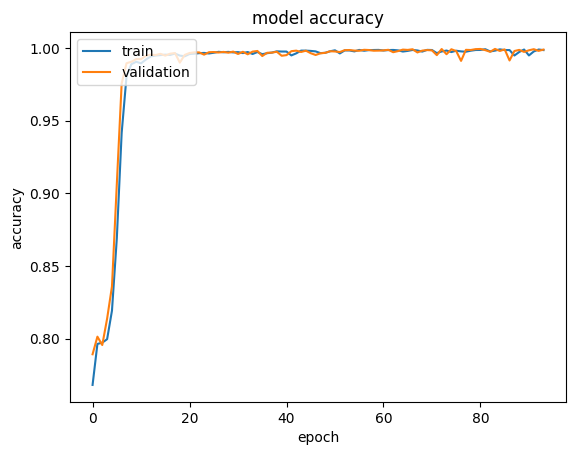

In [28]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
history.history['loss']  #history loss

[0.49955475330352783,
 0.45105409622192383,
 0.4349243640899658,
 0.4133182466030121,
 0.3753414452075958,
 0.30500152707099915,
 0.17901255190372467,
 0.07644271105527878,
 0.04872061684727669,
 0.04218988120555878,
 0.04387553408741951,
 0.033485475927591324,
 0.02542259730398655,
 0.022475533187389374,
 0.021236011758446693,
 0.020392993465065956,
 0.020878445357084274,
 0.01649424433708191,
 0.023192046210169792,
 0.02496698871254921,
 0.018130378797650337,
 0.016319788992404938,
 0.015364769846200943,
 0.014241394586861134,
 0.016340944916009903,
 0.013731831684708595,
 0.011433025822043419,
 0.012698914855718613,
 0.011424757540225983,
 0.01292695663869381,
 0.011931014247238636,
 0.014741526916623116,
 0.012000379152595997,
 0.017538316547870636,
 0.012761276215314865,
 0.018750889226794243,
 0.01547523308545351,
 0.013283630833029747,
 0.009394765831530094,
 0.01053838524967432,
 0.010534490458667278,
 0.022912386804819107,
 0.01594097539782524,
 0.007503093220293522,
 0.007119

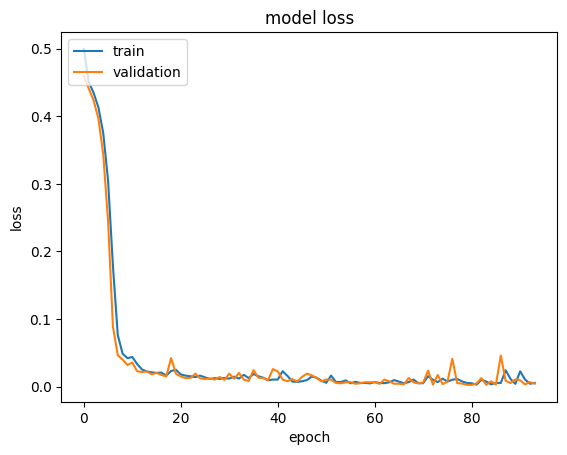

In [30]:
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
len(y_test),len(y_pred)  #y_test and y_pred length

(79317, 79317)

In [32]:
y_pred  #y_pred items

array([[9.9834174e-01],
       [9.9931532e-01],
       [1.7564969e-04],
       ...,
       [9.9865586e-01],
       [1.7564974e-04],
       [6.0419245e-03]], dtype=float32)

In [33]:
y_pred = [np.round(i) for i in y_pred]  #y_pred round
y_pred  #y_pred items

[array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], d

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print('Confustion Matrix is \n', cm)

Confustion Matrix is 
 [[53708    16]
 [   45 25548]]


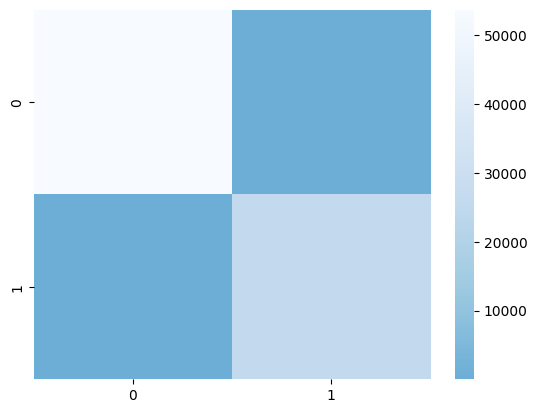

In [35]:
#drawing confusion Matrix
sns.heatmap(cm, center=True, cmap='Blues_r')
plt.show()

In [36]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test, y_pred)
print('Classification Report is \n', ClassificationReport)

Classification Report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53724
           1       1.00      1.00      1.00     25593

    accuracy                           1.00     79317
   macro avg       1.00      1.00      1.00     79317
weighted avg       1.00      1.00      1.00     79317

